In [47]:
import pandas as pd
import numpy as np
from pprint import pprint

#Hyperparameters
a_param = 2.40602424876737
b_param = 3.6653

#flow = a_param*(water_level*b_param)

### Select which file/s to create a rating curve
User should select which reports to create a rating curve from.

**Note:** The rating curve can only be made from completed reports.

In [48]:
import os
from pathlib2 import Path

def get_all_dir(par_dict):
    par_dict = Path(par_dict)
    all_dirs_and_files = os.listdir(par_dict)
    all_dirs = []
    
    for i in all_dirs_and_files:
        full_path = os.path.join(par_dict,i)
        if os.path.isdir(full_path):
            all_dirs.append(full_path)
    
    return all_dirs

def get_report_xl(dir):
    all_files = os.listdir(dir)
    for file in all_files:
        if file.split(' ')[-1] == 'Report.xlsx':
            full_file = os.path.join(dir,file)
            break
    if len(full_file) == 0:
        raise ValueError
    
    return full_file


In [49]:
def select_a_file(river):
    print('Select Report from list below')
    all_dir = get_all_dir(river)
    dir_dict = {}
    count = 0
    for dir in all_dir:
        dir_dict[count] = dir
        count+=1
    
    for key, val in dir_dict.items():
        print(f"{key}: {val}")
    
    path = int(input("Select"))
    # path_lst_str = str(input("Select: "))
    # path_lst_str = path_lst_str.split(",")
    # path_lst_str = [int(i) for i in path_lst_str]
    
    report_files = get_report_xl(dir_dict[path])
    return report_files

def select_multiple_files_continuous(river):
    print('Select Report from list below(note. Seperate with comma e.g. 1,2,3)')
    all_dir = get_all_dir(river)
    dir_dict = {}
    count = 0
    for dir in all_dir:
        dir_dict[count] = dir
        count+=1
    
    for key, val in dir_dict.items():
        print(f"{key}: {val}")
    
    path_lst_str = str(input("Select: "))
    path_lst_str = path_lst_str.split(",")
    path_lst_str = [dir_dict[int(i)] for i in path_lst_str]
    
    report_files = [get_report_xl(path) for path in path_lst_str]

    return report_files


while True:
    try:
        message = "Select River \n0: Cagayan/San Isidro\n1: Tagoloan"
        which_river = int(input(message))

        # if (which_river != 0) | (which_river != 1):
        #     raise ValueError
            
        river_dict = {0: Path(r"Cleaned_Cagayan"),
                    1: Path(r"Cleaned_Tagoloan")}
        river = river_dict[which_river]

        message = """How many reports will you include \n
        1 Report \n
        2/more Reports \n"""

        no_of_files_condition = int(input(message))

        if no_of_files_condition == 1:
            report_file = [select_a_file(river)]
        elif no_of_files_condition == 2:
            report_file = select_multiple_files_continuous(river)
        else:
            raise ValueError
        
        print("\n\nSuccessfully selected report/s. The selected reports are...")
        pprint(report_file)
        
        break
    except ValueError:
        print('Wrong value, please try again')

Select Report from list below
0: Cleaned_Tagoloan\20210109_20210110 Report


Successfully selected report/s. The selected reports are...
'Cleaned_Tagoloan\\20210109_20210110 Report\\20210109_20210110 Report.xlsx'


### Merge

In [58]:
all_df = [pd.read_excel(path, index_col=0) for path in report_file]
main_df = pd.concat(all_df)

if river == river_dict[0]: #if Cagayan
    main_df = main_df[['Corrected Water Level', 'Rain Gauge']]

if river == river_dict[1]: #if Tagoloan
    main_df = main_df[['Corrected Water Level', 'RG0_Diff']]
    main_df.columns = ['Corrected Water Level', 'Rain Gauge']

water_level = main_df['Corrected Water Level'].to_numpy()

flow = a_param*(water_level*b_param)
main_df['Flow'] = flow
main_df

,Corrected Water Level,Rain Gauge,Flow
0,1.917614,0.0,16.911056
1,1.917614,0.0,16.911056
2,1.917614,0.0,16.911056
3,1.917614,0.0,16.911056
4,1.917614,0.0,16.911056
...,...,...,...
2883,2.061428,0.0,18.179323
2884,1.989521,0.0,17.545189
2885,1.989521,0.0,17.545189
2886,1.989521,0.0,17.545189


<AxesSubplot:>

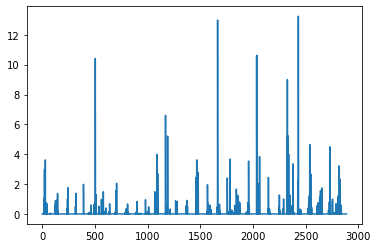